In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import cluster
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances_argmin

from sklearn.cluster import AgglomerativeClustering, KMeans
import scipy.cluster.hierarchy as shc

In [3]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import RMSprop
from keras import regularizers

Using TensorFlow backend.


In [4]:
# Read the data
features = pd.read_csv('./medical/historical_X.dat', header=None, sep=" ").values
actions = pd.read_csv('./medical/historical_A.dat', header=None, sep=" ").values
outcome = pd.read_csv('./medical/historical_Y.dat', header=None, sep=" ").values
observations = features[:, :128]
labels = features[:,128] + features[:,129]*2

In [9]:

# Use bootstrap on the historical dataset to estimate effectiveness of the utility
n = features.shape[0]
num_samples = 1000

placebofeaturesSuccess = 0
placebofeaturesFailure = 0
ExperimentalDrugFeaturesSuccess = 0
ExperimentalDrugFeaturesFailure = 0


for i in range(num_samples):
    randlist = np.random.randint(n, size=n)
    sample_features = features[randlist]
    sample_actions = actions[randlist]
    sample_outcome = outcome[randlist]
    labels = sample_features[:,128] + sample_features[:,129]*2 # symptoms
    
    # The patient has at least one symptom, we don't give treatment and the patient is cured
    if labels[i] != 0 and sample_actions[i] == 0 and sample_outcome[i] == 1: 
        placebofeaturesSuccess = placebofeaturesSuccess + 1
        
    # The patient has at least one symptom, we don't give treatment and the patient is not cured
    if labels[i] != 0 and sample_actions[i] == 0 and sample_outcome[i] == 0: 
        placebofeaturesFailure = placebofeaturesFailure + 1
    
    # The patient has at least one symptom, we give treatment and the patient is cured
    if labels[i] != 0 and actions[i] == 1 and outcome[i] == 1: 
        ExperimentalDrugFeaturesSuccess = ExperimentalDrugFeaturesSuccess + 1
       
    # The patient has at least one symptom, we give treatment and the patient is not cured
    if labels[i] != 0 and actions[i] == 1 and outcome[i] == 0: 
        ExperimentalDrugFeaturesFailure = ExperimentalDrugFeaturesFailure + 1
  

[4, 281, 61, 48]


([<matplotlib.axis.XTick at 0x1a39b242e8>,
 <a list of 4 Text xticklabel objects>)

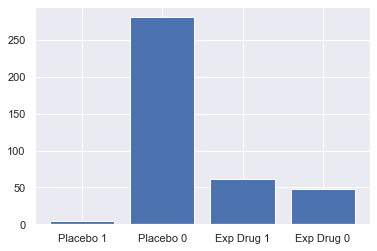

In [10]:
barWidth = 0
y1 = [placebofeaturesSuccess, placebofeaturesFailure, ExperimentalDrugFeaturesSuccess, ExperimentalDrugFeaturesFailure]
r1 = range(len(y1))
print(y1)
plt.bar(r1, y1)
plt.xticks([r + barWidth / 2 for r in range(len(y1))], ['Placebo 1', 'Placebo 0', 'Exp Drug 1', 'Exp Drug 0'])